<a href="https://colab.research.google.com/github/chitransh0052/Neural-Network/blob/main/churn_modeling(ANN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [39]:
data=pd.read_csv('/content/Churn_Modelling.csv')

In [40]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [42]:
data.shape

(10000, 14)

In [43]:
data.isnull().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [44]:
data = data.drop(["RowNumber","CustomerId","Surname"],axis=1)

In [45]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [46]:
data.shape

(10000, 11)

In [48]:
#one hot encoding
data=pd.get_dummies(data,columns=['Geography','Gender'],drop_first=True)

In [50]:
data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


In [51]:
data.shape

(10000, 12)

In [53]:
#  Extract Features(X) and output(y)

X = data.drop('Exited',axis=1)
y = data['Exited']


In [54]:
print(X)
print(y)

      CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0             619   42       2       0.00              1          1   
1             608   41       1   83807.86              1          0   
2             502   42       8  159660.80              3          1   
3             699   39       1       0.00              2          0   
4             850   43       2  125510.82              1          1   
...           ...  ...     ...        ...            ...        ...   
9995          771   39       5       0.00              2          1   
9996          516   35      10   57369.61              1          1   
9997          709   36       7       0.00              1          0   
9998          772   42       3   75075.31              2          1   
9999          792   28       4  130142.79              1          1   

      IsActiveMember  EstimatedSalary  Geography_Germany  Geography_Spain  \
0                  1        101348.88              False            Fa

In [64]:
# train test split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
y_test.shape

(8000, 11)
(2000, 11)
(8000,)


(2000,)

In [65]:
# StandardScaler

from sklearn.preprocessing import StandardScaler

# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
print(X_train)
print(X_test)

[[ 0.35649971 -0.6557859   0.34567966 ... -0.57946723 -0.57638802
   0.91324755]
 [-0.20389777  0.29493847 -0.3483691  ...  1.72572313 -0.57638802
   0.91324755]
 [-0.96147213 -1.41636539 -0.69539349 ... -0.57946723  1.73494238
   0.91324755]
 ...
 [ 0.86500853 -0.08535128 -1.38944225 ... -0.57946723 -0.57638802
  -1.09499335]
 [ 0.15932282  0.3900109   1.03972843 ... -0.57946723 -0.57638802
   0.91324755]
 [ 0.47065475  1.15059039 -1.38944225 ...  1.72572313 -0.57638802
   0.91324755]]
[[-0.57749609 -0.6557859  -0.69539349 ...  1.72572313 -0.57638802
   0.91324755]
 [-0.29729735  0.3900109  -1.38944225 ... -0.57946723 -0.57638802
   0.91324755]
 [-0.52560743  0.48508334 -0.3483691  ... -0.57946723  1.73494238
  -1.09499335]
 ...
 [ 0.81311987  0.77030065  0.69270405 ... -0.57946723 -0.57638802
  -1.09499335]
 [ 0.41876609 -0.94100321 -0.3483691  ... -0.57946723 -0.57638802
   0.91324755]
 [-0.24540869  0.00972116 -1.38944225 ...  1.72572313 -0.57638802
   0.91324755]]


In [74]:
#  transform x train Scaled
X_train_scaled = sc.fit_transform(X_train)

In [75]:
X_test_scaled = sc.transform(X_test)


In [76]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [77]:
model=Sequential()
model.add(Dense(3,activation='relu',input_dim=11))
model.add(Dense(1,activation='sigmoid'))


In [78]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                      │ (None, 3)                   │              36 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 40 (160.00 B)

 Trainable params: 40 (160.00 B)

 Non-trainable params: 0 (0.00 B)

In [81]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [83]:
model.fit(X_train_scaled,y_train,epochs=10,validation_split=0.2)

Epoch 1/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8212 - loss: 0.4151 - val_accuracy: 0.8275 - val_loss: 0.4107
Epoch 2/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8286 - loss: 0.4150 - val_accuracy: 0.8281 - val_loss: 0.4099
Epoch 3/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8226 - loss: 0.4245 - val_accuracy: 0.8288 - val_loss: 0.4090
Epoch 4/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8300 - loss: 0.4118 - val_accuracy: 0.8288 - val_loss: 0.4085
Epoch 5/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8275 - loss: 0.4249 - val_accuracy: 0.8300 - val_loss: 0.4079
Epoch 6/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8261 - loss: 0.4247 - val_accuracy: 0.8300 - val_loss: 0.4073
Epoch 7/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8284 - loss: 0.4196 - val_accuracy: 0.8331 - val_loss: 0.4068
Epoch 8/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8235 - loss: 0.4276 - val_accuracy: 0.

In [86]:
model.fit(X_test_scaled,y_test,epochs=10,validation_split=0.2)

Epoch 1/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.8106 - loss: 0.4257 - val_accuracy: 0.8325 - val_loss: 0.3788
Epoch 2/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8263 - loss: 0.4106 - val_accuracy: 0.8325 - val_loss: 0.3789
Epoch 3/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8229 - loss: 0.3958 - val_accuracy: 0.8300 - val_loss: 0.3789
Epoch 4/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8219 - loss: 0.4131 - val_accuracy: 0.8300 - val_loss: 0.3791
Epoch 5/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8339 - loss: 0.3912 - val_accuracy: 0.8300 - val_loss: 0.3791
Epoch 6/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8328 - loss: 0.3907 - val_accuracy: 0.8300 - val_loss: 0.3797
Epoch 7/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8371 - loss: 0.3892 - val_accuracy: 0.8325 - val_loss: 0.3797
Epoch 8/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8237 - loss: 0.4069 - val_accuracy: 0.8325 - val_lo

In [88]:
model=Sequential()
model.add(Dense(10,activation='relu',input_dim=11))
model.add(Dense(5,activation='relu'))
model.add(Dense(3,activation='relu'))

model.add(Dense(1,activation='sigmoid'))

In [90]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [91]:
model.fit(X_train_scaled,y_train,epochs=50,validation_split=0.2)

Epoch 1/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3434 - loss: 0.9403 - val_accuracy: 0.7975 - val_loss: 0.5409
Epoch 2/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7855 - loss: 0.5253 - val_accuracy: 0.7987 - val_loss: 0.4755
Epoch 3/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7872 - loss: 0.4789 - val_accuracy: 0.7981 - val_loss: 0.4487
Epoch 4/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8038 - loss: 0.4398 - val_accuracy: 0.8037 - val_loss: 0.4326
Epoch 5/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8065 - loss: 0.4328 - val_accuracy: 0.8081 - val_loss: 0.4194
Epoch 6/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8107 - loss: 0.4173 - val_accuracy: 0.8125 - val_loss: 0.4065
Epoch 7/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8094 - loss: 0.4096 - val_accuracy: 0.8231 - val_loss: 0.3937
Epoch 8/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8200 - loss: 0.3955 - val_accuracy: 0.

In [92]:
history=model.fit(X_train_scaled,y_train,epochs=50,validation_split=0.2)

Epoch 1/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8589 - loss: 0.3273 - val_accuracy: 0.8494 - val_loss: 0.3520
Epoch 2/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8545 - loss: 0.3427 - val_accuracy: 0.8519 - val_loss: 0.3515
Epoch 3/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8642 - loss: 0.3369 - val_accuracy: 0.8506 - val_loss: 0.3509
Epoch 4/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.8682 - loss: 0.3176 - val_accuracy: 0.8506 - val_loss: 0.3509
Epoch 5/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.8625 - loss: 0.3219 - val_accuracy: 0.8506 - val_loss: 0.3511
Epoch 6/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.8565 - loss: 0.3405 - val_accuracy: 0.8487 - val_loss: 0.3516
Epoch 7/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8590 - loss: 0.3320 - val_accuracy: 0.8500 - val_loss: 0.3525
Epoch 8/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8616 - loss: 0.3293 - val_accuracy:

In [93]:
history.history

{'accuracy': [0.8603125214576721,
  0.8604687452316284,
  0.8618749976158142,
  0.8617187738418579,
  0.8592187762260437,
  0.8609374761581421,
  0.8618749976158142,
  0.8612499833106995,
  0.8618749976158142,
  0.8621875047683716,
  0.8621875047683716,
  0.8626562356948853,
  0.86328125,
  0.8629687428474426,
  0.8623437285423279,
  0.8642187714576721,
  0.8628125190734863,
  0.8629687428474426,
  0.8635937571525574,
  0.86328125,
  0.8642187714576721,
  0.8628125190734863,
  0.8635937571525574,
  0.8643749952316284,
  0.8635937571525574,
  0.864062488079071,
  0.8643749952316284,
  0.8654687404632568,
  0.866406261920929,
  0.8631250262260437,
  0.8650000095367432,
  0.8660937547683716,
  0.8651562333106995,
  0.8659374713897705,
  0.8662499785423279,
  0.8646875023841858,
  0.8659374713897705,
  0.8657812476158142,
  0.8654687404632568,
  0.8648437261581421,
  0.8659374713897705,
  0.8670312762260437,
  0.8653125166893005,
  0.8660937547683716,
  0.8662499785423279,
  0.867500007152

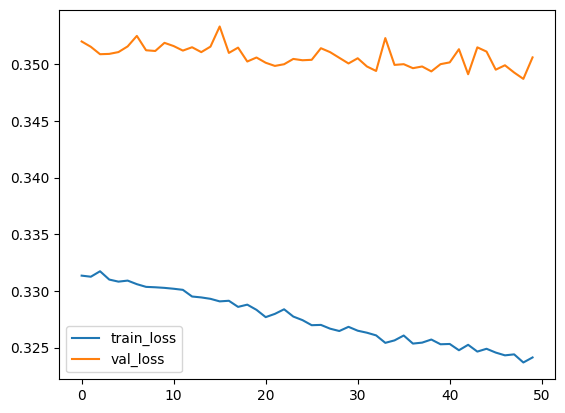

In [95]:
plt.plot(history.history['loss'],label='train_loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.legend()
plt.show()

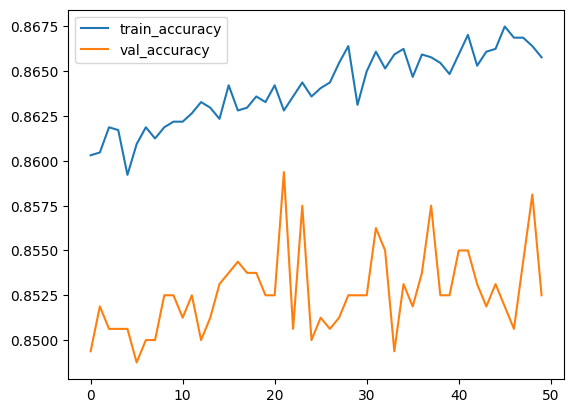

In [96]:
# Plot the accuracy
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()